## CB02-4 Part Four: Data

### 01 Creating toy data

In [1]:
import torch
x_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])
y_train = torch.tensor([0, 0, 0, 1, 1])

x_test = torch.tensor([
[-0.8, 2.8],
[2.6, -1.6],
])
y_test = torch.tensor([0, 1])

### 02 Toy Dataset: a wrapper of Data

In [2]:
from torch.utils.data import Dataset
class ToyDataset(Dataset):
    def __init__(self, x, y):
        self.features = x
        self.labels = y

    def __len__(self):
        return self.labels.shape[0] # self.features.shape[0]
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = ToyDataset(x_train, y_train)
test_dataset = ToyDataset(x_test, y_test)

In [3]:
len(train_dataset), len(test_dataset)

(5, 2)

### 03 Toy Dataloader

In [4]:
from torch.utils.data import DataLoader

torch.manual_seed(0)
train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=2, 
    shuffle=True,
    num_workers= 0,
)

test_loader = DataLoader(
    dataset=test_dataset, 
    batch_size=2, 
    shuffle=False,
    num_workers= 0,
)

In [5]:
for x_batch, y_batch in train_loader:
    print('fatures: ',x_batch, '\n','labels:', y_batch)

fatures:  tensor([[-0.9000,  2.9000],
        [ 2.7000, -1.5000]]) 
 labels: tensor([0, 1])
fatures:  tensor([[-0.5000,  2.6000],
        [ 2.3000, -1.1000]]) 
 labels: tensor([0, 1])
fatures:  tensor([[-1.2000,  3.1000]]) 
 labels: tensor([0])


Note:
1. one epoch: iterates over the traning dataset, and visits each sample exactly once.
2. for next epoch, will re-shuffle again.

### 04 Minor Change: drop the last batch

In [6]:
train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=2, 
    shuffle=True,
    num_workers= 0,
    drop_last=True
)


In [7]:
for x_batch, y_batch in train_loader:
    print('fatures: ',x_batch, '\n','labels:', y_batch)
    print('---'*20)

fatures:  tensor([[-0.5000,  2.6000],
        [ 2.3000, -1.1000]]) 
 labels: tensor([0, 1])
------------------------------------------------------------
fatures:  tensor([[ 2.7000, -1.5000],
        [-1.2000,  3.1000]]) 
 labels: tensor([1, 0])
------------------------------------------------------------


### Num-of-workers
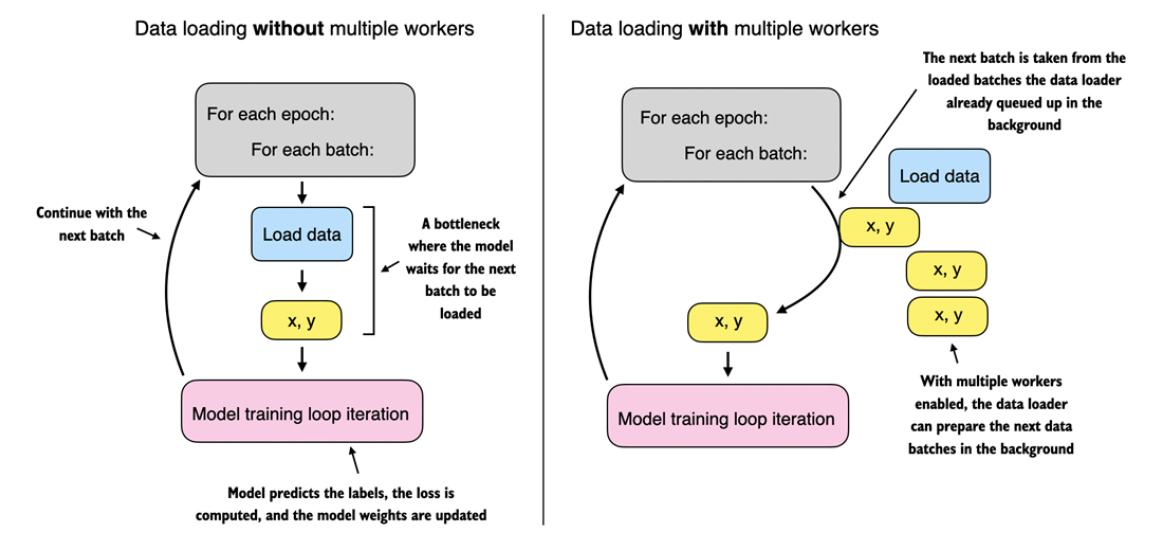

Note:
1. for small dataset: set 'num_workers = 0'
2. when 'num_workers > 0', may lead to issues for Jupyter notebook
3. depends on hardward & dataset. Could try 'num_workers = 4'. 